<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo">
</center>

# Gradient Boosting  for classification with Python

Estimated time needed: **1.45** hours


In this notebook, you will learn Gradient Boosting for classification; AdaBoost is a particular case of Gradient Boosting and an additive model where we add weak learners to minimize the loss function. This lab will focus on <a href="https://xgboost.readthedocs.io/en/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01">XGBoost</a>, an open-source software library that provides a regularizing gradient boosting framework.  XGBoost can use different types of weak learners called boosters for classification and regression. We will focus on trees for classification.


Unlike Bagging and Random Forest, Gradient Boosting can cause overfitting. As a result, Gradient Boosting requires Hyperparameter tuning, taking more time to train. One advantage of Gradient Boosting is that each classifier is smaller, so predictions are faster in Gradient Boosting.
AdaBoost is a subclass of Gradient Boosting; one weakness of AdaBoost is that misclassified samples cause overfitting; Gradient Boosting uses different loss functions, reducing this effect.
The following table show's the Average accuracy and standard deviation for the Random Forest (RF), gradient boosting (GB) and XGBoost, both using the default (D) and (T) tuned parameter settings, we see that XGBoost does best, followed by GB outperforming the other methods.


<html xmlns:v="urn:schemas-microsoft-com:vml"
xmlns:o="urn:schemas-microsoft-com:office:office"
xmlns:w="urn:schemas-microsoft-com:office:word"
xmlns:x="urn:schemas-microsoft-com:office:excel"
xmlns:m="http://schemas.microsoft.com/office/2004/12/omml"
xmlns="http://www.w3.org/TR/REC-html40">

<head>
<meta http-equiv=Content-Type content="text/html; charset=utf-8">
<meta name=ProgId content=Word.Document>
<meta name=Generator content="Microsoft Word 15">
<meta name=Originator content="Microsoft Word 15">
<link rel=File-List href="Dataset.fld/filelist.xml">
<!--[if gte mso 9]><xml>
 <o:DocumentProperties>
  <o:Author>Joseph Santarcangelo</o:Author>
  <o:LastAuthor>Joseph Santarcangelo</o:LastAuthor>
  <o:Revision>1</o:Revision>
  <o:TotalTime>5</o:TotalTime>
  <o:Created>2022-03-13T04:19:00Z</o:Created>
  <o:LastSaved>2022-03-13T22:02:00Z</o:LastSaved>
  <o:Pages>1</o:Pages>
  <o:Words>347</o:Words>
  <o:Characters>1984</o:Characters>
  <o:Lines>16</o:Lines>
  <o:Paragraphs>4</o:Paragraphs>
  <o:CharactersWithSpaces>2327</o:CharactersWithSpaces>
  <o:Version>16.00</o:Version>
 </o:DocumentProperties>
 <o:OfficeDocumentSettings>
  <o:AllowPNG/>
 </o:OfficeDocumentSettings>
</xml><![endif]-->
<link rel=themeData href="Dataset.fld/themedata.thmx">
<link rel=colorSchemeMapping href="Dataset.fld/colorschememapping.xml">
<!--[if gte mso 9]><xml>
 <w:WordDocument>
  <w:SpellingState>Clean</w:SpellingState>
  <w:GrammarState>Clean</w:GrammarState>
  <w:TrackMoves>false</w:TrackMoves>
  <w:TrackFormatting/>
  <w:PunctuationKerning/>
  <w:ValidateAgainstSchemas/>
  <w:SaveIfXMLInvalid>false</w:SaveIfXMLInvalid>
  <w:IgnoreMixedContent>false</w:IgnoreMixedContent>
  <w:AlwaysShowPlaceholderText>false</w:AlwaysShowPlaceholderText>
  <w:DoNotPromoteQF/>
  <w:LidThemeOther>EN-CA</w:LidThemeOther>
  <w:LidThemeAsian>X-NONE</w:LidThemeAsian>
  <w:LidThemeComplexScript>X-NONE</w:LidThemeComplexScript>
  <w:Compatibility>
   <w:BreakWrappedTables/>
   <w:SnapToGridInCell/>
   <w:WrapTextWithPunct/>
   <w:UseAsianBreakRules/>
   <w:DontGrowAutofit/>
   <w:SplitPgBreakAndParaMark/>
   <w:EnableOpenTypeKerning/>
   <w:DontFlipMirrorIndents/>
   <w:OverrideTableStyleHps/>
  </w:Compatibility>
  <m:mathPr>
   <m:mathFont m:val="Cambria Math"/>
   <m:brkBin m:val="before"/>
   <m:brkBinSub m:val="&#45;-"/>
   <m:smallFrac m:val="off"/>
   <m:dispDef/>
   <m:lMargin m:val="0"/>
   <m:rMargin m:val="0"/>
   <m:defJc m:val="centerGroup"/>
   <m:wrapIndent m:val="1440"/>
   <m:intLim m:val="subSup"/>
   <m:naryLim m:val="undOvr"/>
  </m:mathPr></w:WordDocument>
</xml><![endif]--><!--[if gte mso 9]><xml>
 <w:LatentStyles DefLockedState="false" DefUnhideWhenUsed="false"
  DefSemiHidden="false" DefQFormat="false" DefPriority="99"
  LatentStyleCount="376">
  <w:LsdException Locked="false" Priority="0" QFormat="true" Name="Normal"/>
  <w:LsdException Locked="false" Priority="9" QFormat="true" Name="heading 1"/>
  <w:LsdException Locked="false" Priority="9" SemiHidden="true"
   UnhideWhenUsed="true" QFormat="true" Name="heading 2"/>
  <w:LsdException Locked="false" Priority="9" SemiHidden="true"
   UnhideWhenUsed="true" QFormat="true" Name="heading 3"/>
  <w:LsdException Locked="false" Priority="9" SemiHidden="true"
   UnhideWhenUsed="true" QFormat="true" Name="heading 4"/>
  <w:LsdException Locked="false" Priority="9" SemiHidden="true"
   UnhideWhenUsed="true" QFormat="true" Name="heading 5"/>
  <w:LsdException Locked="false" Priority="9" SemiHidden="true"
   UnhideWhenUsed="true" QFormat="true" Name="heading 6"/>
  <w:LsdException Locked="false" Priority="9" SemiHidden="true"
   UnhideWhenUsed="true" QFormat="true" Name="heading 7"/>
  <w:LsdException Locked="false" Priority="9" SemiHidden="true"
   UnhideWhenUsed="true" QFormat="true" Name="heading 8"/>
  <w:LsdException Locked="false" Priority="9" SemiHidden="true"
   UnhideWhenUsed="true" QFormat="true" Name="heading 9"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="index 1"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="index 2"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="index 3"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="index 4"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="index 5"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="index 6"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="index 7"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="index 8"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="index 9"/>
  <w:LsdException Locked="false" Priority="39" SemiHidden="true"
   UnhideWhenUsed="true" Name="toc 1"/>
  <w:LsdException Locked="false" Priority="39" SemiHidden="true"
   UnhideWhenUsed="true" Name="toc 2"/>
  <w:LsdException Locked="false" Priority="39" SemiHidden="true"
   UnhideWhenUsed="true" Name="toc 3"/>
  <w:LsdException Locked="false" Priority="39" SemiHidden="true"
   UnhideWhenUsed="true" Name="toc 4"/>
  <w:LsdException Locked="false" Priority="39" SemiHidden="true"
   UnhideWhenUsed="true" Name="toc 5"/>
  <w:LsdException Locked="false" Priority="39" SemiHidden="true"
   UnhideWhenUsed="true" Name="toc 6"/>
  <w:LsdException Locked="false" Priority="39" SemiHidden="true"
   UnhideWhenUsed="true" Name="toc 7"/>
  <w:LsdException Locked="false" Priority="39" SemiHidden="true"
   UnhideWhenUsed="true" Name="toc 8"/>
  <w:LsdException Locked="false" Priority="39" SemiHidden="true"
   UnhideWhenUsed="true" Name="toc 9"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Normal Indent"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="footnote text"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="annotation text"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="header"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="footer"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="index heading"/>
  <w:LsdException Locked="false" Priority="35" SemiHidden="true"
   UnhideWhenUsed="true" QFormat="true" Name="caption"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="table of figures"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="envelope address"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="envelope return"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="footnote reference"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="annotation reference"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="line number"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="page number"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="endnote reference"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="endnote text"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="table of authorities"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="macro"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="toa heading"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List Bullet"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List Number"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List 2"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List 3"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List 4"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List 5"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List Bullet 2"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List Bullet 3"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List Bullet 4"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List Bullet 5"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List Number 2"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List Number 3"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List Number 4"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List Number 5"/>
  <w:LsdException Locked="false" Priority="10" QFormat="true" Name="Title"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Closing"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Signature"/>
  <w:LsdException Locked="false" Priority="1" SemiHidden="true"
   UnhideWhenUsed="true" Name="Default Paragraph Font"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Body Text"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Body Text Indent"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List Continue"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List Continue 2"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List Continue 3"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List Continue 4"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="List Continue 5"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Message Header"/>
  <w:LsdException Locked="false" Priority="11" QFormat="true" Name="Subtitle"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Salutation"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Date"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Body Text First Indent"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Body Text First Indent 2"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Note Heading"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Body Text 2"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Body Text 3"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Body Text Indent 2"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Body Text Indent 3"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Block Text"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Hyperlink"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="FollowedHyperlink"/>
  <w:LsdException Locked="false" Priority="22" QFormat="true" Name="Strong"/>
  <w:LsdException Locked="false" Priority="20" QFormat="true" Name="Emphasis"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Document Map"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Plain Text"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="E-mail Signature"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="HTML Top of Form"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="HTML Bottom of Form"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Normal (Web)"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="HTML Acronym"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="HTML Address"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="HTML Cite"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="HTML Code"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="HTML Definition"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="HTML Keyboard"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="HTML Preformatted"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="HTML Sample"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="HTML Typewriter"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="HTML Variable"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Normal Table"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="annotation subject"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="No List"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Outline List 1"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Outline List 2"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Outline List 3"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Simple 1"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Simple 2"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Simple 3"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Classic 1"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Classic 2"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Classic 3"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Classic 4"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Colorful 1"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Colorful 2"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Colorful 3"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Columns 1"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Columns 2"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Columns 3"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Columns 4"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Columns 5"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Grid 1"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Grid 2"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Grid 3"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Grid 4"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Grid 5"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Grid 6"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Grid 7"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Grid 8"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table List 1"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table List 2"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table List 3"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table List 4"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table List 5"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table List 6"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table List 7"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table List 8"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table 3D effects 1"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table 3D effects 2"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table 3D effects 3"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Contemporary"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Elegant"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Professional"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Subtle 1"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Subtle 2"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Web 1"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Web 2"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Web 3"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Balloon Text"/>
  <w:LsdException Locked="false" Priority="39" Name="Table Grid"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Table Theme"/>
  <w:LsdException Locked="false" SemiHidden="true" Name="Placeholder Text"/>
  <w:LsdException Locked="false" Priority="1" QFormat="true" Name="No Spacing"/>
  <w:LsdException Locked="false" Priority="60" Name="Light Shading"/>
  <w:LsdException Locked="false" Priority="61" Name="Light List"/>
  <w:LsdException Locked="false" Priority="62" Name="Light Grid"/>
  <w:LsdException Locked="false" Priority="63" Name="Medium Shading 1"/>
  <w:LsdException Locked="false" Priority="64" Name="Medium Shading 2"/>
  <w:LsdException Locked="false" Priority="65" Name="Medium List 1"/>
  <w:LsdException Locked="false" Priority="66" Name="Medium List 2"/>
  <w:LsdException Locked="false" Priority="67" Name="Medium Grid 1"/>
  <w:LsdException Locked="false" Priority="68" Name="Medium Grid 2"/>
  <w:LsdException Locked="false" Priority="69" Name="Medium Grid 3"/>
  <w:LsdException Locked="false" Priority="70" Name="Dark List"/>
  <w:LsdException Locked="false" Priority="71" Name="Colorful Shading"/>
  <w:LsdException Locked="false" Priority="72" Name="Colorful List"/>
  <w:LsdException Locked="false" Priority="73" Name="Colorful Grid"/>
  <w:LsdException Locked="false" Priority="60" Name="Light Shading Accent 1"/>
  <w:LsdException Locked="false" Priority="61" Name="Light List Accent 1"/>
  <w:LsdException Locked="false" Priority="62" Name="Light Grid Accent 1"/>
  <w:LsdException Locked="false" Priority="63" Name="Medium Shading 1 Accent 1"/>
  <w:LsdException Locked="false" Priority="64" Name="Medium Shading 2 Accent 1"/>
  <w:LsdException Locked="false" Priority="65" Name="Medium List 1 Accent 1"/>
  <w:LsdException Locked="false" SemiHidden="true" Name="Revision"/>
  <w:LsdException Locked="false" Priority="34" QFormat="true"
   Name="List Paragraph"/>
  <w:LsdException Locked="false" Priority="29" QFormat="true" Name="Quote"/>
  <w:LsdException Locked="false" Priority="30" QFormat="true"
   Name="Intense Quote"/>
  <w:LsdException Locked="false" Priority="66" Name="Medium List 2 Accent 1"/>
  <w:LsdException Locked="false" Priority="67" Name="Medium Grid 1 Accent 1"/>
  <w:LsdException Locked="false" Priority="68" Name="Medium Grid 2 Accent 1"/>
  <w:LsdException Locked="false" Priority="69" Name="Medium Grid 3 Accent 1"/>
  <w:LsdException Locked="false" Priority="70" Name="Dark List Accent 1"/>
  <w:LsdException Locked="false" Priority="71" Name="Colorful Shading Accent 1"/>
  <w:LsdException Locked="false" Priority="72" Name="Colorful List Accent 1"/>
  <w:LsdException Locked="false" Priority="73" Name="Colorful Grid Accent 1"/>
  <w:LsdException Locked="false" Priority="60" Name="Light Shading Accent 2"/>
  <w:LsdException Locked="false" Priority="61" Name="Light List Accent 2"/>
  <w:LsdException Locked="false" Priority="62" Name="Light Grid Accent 2"/>
  <w:LsdException Locked="false" Priority="63" Name="Medium Shading 1 Accent 2"/>
  <w:LsdException Locked="false" Priority="64" Name="Medium Shading 2 Accent 2"/>
  <w:LsdException Locked="false" Priority="65" Name="Medium List 1 Accent 2"/>
  <w:LsdException Locked="false" Priority="66" Name="Medium List 2 Accent 2"/>
  <w:LsdException Locked="false" Priority="67" Name="Medium Grid 1 Accent 2"/>
  <w:LsdException Locked="false" Priority="68" Name="Medium Grid 2 Accent 2"/>
  <w:LsdException Locked="false" Priority="69" Name="Medium Grid 3 Accent 2"/>
  <w:LsdException Locked="false" Priority="70" Name="Dark List Accent 2"/>
  <w:LsdException Locked="false" Priority="71" Name="Colorful Shading Accent 2"/>
  <w:LsdException Locked="false" Priority="72" Name="Colorful List Accent 2"/>
  <w:LsdException Locked="false" Priority="73" Name="Colorful Grid Accent 2"/>
  <w:LsdException Locked="false" Priority="60" Name="Light Shading Accent 3"/>
  <w:LsdException Locked="false" Priority="61" Name="Light List Accent 3"/>
  <w:LsdException Locked="false" Priority="62" Name="Light Grid Accent 3"/>
  <w:LsdException Locked="false" Priority="63" Name="Medium Shading 1 Accent 3"/>
  <w:LsdException Locked="false" Priority="64" Name="Medium Shading 2 Accent 3"/>
  <w:LsdException Locked="false" Priority="65" Name="Medium List 1 Accent 3"/>
  <w:LsdException Locked="false" Priority="66" Name="Medium List 2 Accent 3"/>
  <w:LsdException Locked="false" Priority="67" Name="Medium Grid 1 Accent 3"/>
  <w:LsdException Locked="false" Priority="68" Name="Medium Grid 2 Accent 3"/>
  <w:LsdException Locked="false" Priority="69" Name="Medium Grid 3 Accent 3"/>
  <w:LsdException Locked="false" Priority="70" Name="Dark List Accent 3"/>
  <w:LsdException Locked="false" Priority="71" Name="Colorful Shading Accent 3"/>
  <w:LsdException Locked="false" Priority="72" Name="Colorful List Accent 3"/>
  <w:LsdException Locked="false" Priority="73" Name="Colorful Grid Accent 3"/>
  <w:LsdException Locked="false" Priority="60" Name="Light Shading Accent 4"/>
  <w:LsdException Locked="false" Priority="61" Name="Light List Accent 4"/>
  <w:LsdException Locked="false" Priority="62" Name="Light Grid Accent 4"/>
  <w:LsdException Locked="false" Priority="63" Name="Medium Shading 1 Accent 4"/>
  <w:LsdException Locked="false" Priority="64" Name="Medium Shading 2 Accent 4"/>
  <w:LsdException Locked="false" Priority="65" Name="Medium List 1 Accent 4"/>
  <w:LsdException Locked="false" Priority="66" Name="Medium List 2 Accent 4"/>
  <w:LsdException Locked="false" Priority="67" Name="Medium Grid 1 Accent 4"/>
  <w:LsdException Locked="false" Priority="68" Name="Medium Grid 2 Accent 4"/>
  <w:LsdException Locked="false" Priority="69" Name="Medium Grid 3 Accent 4"/>
  <w:LsdException Locked="false" Priority="70" Name="Dark List Accent 4"/>
  <w:LsdException Locked="false" Priority="71" Name="Colorful Shading Accent 4"/>
  <w:LsdException Locked="false" Priority="72" Name="Colorful List Accent 4"/>
  <w:LsdException Locked="false" Priority="73" Name="Colorful Grid Accent 4"/>
  <w:LsdException Locked="false" Priority="60" Name="Light Shading Accent 5"/>
  <w:LsdException Locked="false" Priority="61" Name="Light List Accent 5"/>
  <w:LsdException Locked="false" Priority="62" Name="Light Grid Accent 5"/>
  <w:LsdException Locked="false" Priority="63" Name="Medium Shading 1 Accent 5"/>
  <w:LsdException Locked="false" Priority="64" Name="Medium Shading 2 Accent 5"/>
  <w:LsdException Locked="false" Priority="65" Name="Medium List 1 Accent 5"/>
  <w:LsdException Locked="false" Priority="66" Name="Medium List 2 Accent 5"/>
  <w:LsdException Locked="false" Priority="67" Name="Medium Grid 1 Accent 5"/>
  <w:LsdException Locked="false" Priority="68" Name="Medium Grid 2 Accent 5"/>
  <w:LsdException Locked="false" Priority="69" Name="Medium Grid 3 Accent 5"/>
  <w:LsdException Locked="false" Priority="70" Name="Dark List Accent 5"/>
  <w:LsdException Locked="false" Priority="71" Name="Colorful Shading Accent 5"/>
  <w:LsdException Locked="false" Priority="72" Name="Colorful List Accent 5"/>
  <w:LsdException Locked="false" Priority="73" Name="Colorful Grid Accent 5"/>
  <w:LsdException Locked="false" Priority="60" Name="Light Shading Accent 6"/>
  <w:LsdException Locked="false" Priority="61" Name="Light List Accent 6"/>
  <w:LsdException Locked="false" Priority="62" Name="Light Grid Accent 6"/>
  <w:LsdException Locked="false" Priority="63" Name="Medium Shading 1 Accent 6"/>
  <w:LsdException Locked="false" Priority="64" Name="Medium Shading 2 Accent 6"/>
  <w:LsdException Locked="false" Priority="65" Name="Medium List 1 Accent 6"/>
  <w:LsdException Locked="false" Priority="66" Name="Medium List 2 Accent 6"/>
  <w:LsdException Locked="false" Priority="67" Name="Medium Grid 1 Accent 6"/>
  <w:LsdException Locked="false" Priority="68" Name="Medium Grid 2 Accent 6"/>
  <w:LsdException Locked="false" Priority="69" Name="Medium Grid 3 Accent 6"/>
  <w:LsdException Locked="false" Priority="70" Name="Dark List Accent 6"/>
  <w:LsdException Locked="false" Priority="71" Name="Colorful Shading Accent 6"/>
  <w:LsdException Locked="false" Priority="72" Name="Colorful List Accent 6"/>
  <w:LsdException Locked="false" Priority="73" Name="Colorful Grid Accent 6"/>
  <w:LsdException Locked="false" Priority="19" QFormat="true"
   Name="Subtle Emphasis"/>
  <w:LsdException Locked="false" Priority="21" QFormat="true"
   Name="Intense Emphasis"/>
  <w:LsdException Locked="false" Priority="31" QFormat="true"
   Name="Subtle Reference"/>
  <w:LsdException Locked="false" Priority="32" QFormat="true"
   Name="Intense Reference"/>
  <w:LsdException Locked="false" Priority="33" QFormat="true" Name="Book Title"/>
  <w:LsdException Locked="false" Priority="37" SemiHidden="true"
   UnhideWhenUsed="true" Name="Bibliography"/>
  <w:LsdException Locked="false" Priority="39" SemiHidden="true"
   UnhideWhenUsed="true" QFormat="true" Name="TOC Heading"/>
  <w:LsdException Locked="false" Priority="41" Name="Plain Table 1"/>
  <w:LsdException Locked="false" Priority="42" Name="Plain Table 2"/>
  <w:LsdException Locked="false" Priority="43" Name="Plain Table 3"/>
  <w:LsdException Locked="false" Priority="44" Name="Plain Table 4"/>
  <w:LsdException Locked="false" Priority="45" Name="Plain Table 5"/>
  <w:LsdException Locked="false" Priority="40" Name="Grid Table Light"/>
  <w:LsdException Locked="false" Priority="46" Name="Grid Table 1 Light"/>
  <w:LsdException Locked="false" Priority="47" Name="Grid Table 2"/>
  <w:LsdException Locked="false" Priority="48" Name="Grid Table 3"/>
  <w:LsdException Locked="false" Priority="49" Name="Grid Table 4"/>
  <w:LsdException Locked="false" Priority="50" Name="Grid Table 5 Dark"/>
  <w:LsdException Locked="false" Priority="51" Name="Grid Table 6 Colorful"/>
  <w:LsdException Locked="false" Priority="52" Name="Grid Table 7 Colorful"/>
  <w:LsdException Locked="false" Priority="46"
   Name="Grid Table 1 Light Accent 1"/>
  <w:LsdException Locked="false" Priority="47" Name="Grid Table 2 Accent 1"/>
  <w:LsdException Locked="false" Priority="48" Name="Grid Table 3 Accent 1"/>
  <w:LsdException Locked="false" Priority="49" Name="Grid Table 4 Accent 1"/>
  <w:LsdException Locked="false" Priority="50" Name="Grid Table 5 Dark Accent 1"/>
  <w:LsdException Locked="false" Priority="51"
   Name="Grid Table 6 Colorful Accent 1"/>
  <w:LsdException Locked="false" Priority="52"
   Name="Grid Table 7 Colorful Accent 1"/>
  <w:LsdException Locked="false" Priority="46"
   Name="Grid Table 1 Light Accent 2"/>
  <w:LsdException Locked="false" Priority="47" Name="Grid Table 2 Accent 2"/>
  <w:LsdException Locked="false" Priority="48" Name="Grid Table 3 Accent 2"/>
  <w:LsdException Locked="false" Priority="49" Name="Grid Table 4 Accent 2"/>
  <w:LsdException Locked="false" Priority="50" Name="Grid Table 5 Dark Accent 2"/>
  <w:LsdException Locked="false" Priority="51"
   Name="Grid Table 6 Colorful Accent 2"/>
  <w:LsdException Locked="false" Priority="52"
   Name="Grid Table 7 Colorful Accent 2"/>
  <w:LsdException Locked="false" Priority="46"
   Name="Grid Table 1 Light Accent 3"/>
  <w:LsdException Locked="false" Priority="47" Name="Grid Table 2 Accent 3"/>
  <w:LsdException Locked="false" Priority="48" Name="Grid Table 3 Accent 3"/>
  <w:LsdException Locked="false" Priority="49" Name="Grid Table 4 Accent 3"/>
  <w:LsdException Locked="false" Priority="50" Name="Grid Table 5 Dark Accent 3"/>
  <w:LsdException Locked="false" Priority="51"
   Name="Grid Table 6 Colorful Accent 3"/>
  <w:LsdException Locked="false" Priority="52"
   Name="Grid Table 7 Colorful Accent 3"/>
  <w:LsdException Locked="false" Priority="46"
   Name="Grid Table 1 Light Accent 4"/>
  <w:LsdException Locked="false" Priority="47" Name="Grid Table 2 Accent 4"/>
  <w:LsdException Locked="false" Priority="48" Name="Grid Table 3 Accent 4"/>
  <w:LsdException Locked="false" Priority="49" Name="Grid Table 4 Accent 4"/>
  <w:LsdException Locked="false" Priority="50" Name="Grid Table 5 Dark Accent 4"/>
  <w:LsdException Locked="false" Priority="51"
   Name="Grid Table 6 Colorful Accent 4"/>
  <w:LsdException Locked="false" Priority="52"
   Name="Grid Table 7 Colorful Accent 4"/>
  <w:LsdException Locked="false" Priority="46"
   Name="Grid Table 1 Light Accent 5"/>
  <w:LsdException Locked="false" Priority="47" Name="Grid Table 2 Accent 5"/>
  <w:LsdException Locked="false" Priority="48" Name="Grid Table 3 Accent 5"/>
  <w:LsdException Locked="false" Priority="49" Name="Grid Table 4 Accent 5"/>
  <w:LsdException Locked="false" Priority="50" Name="Grid Table 5 Dark Accent 5"/>
  <w:LsdException Locked="false" Priority="51"
   Name="Grid Table 6 Colorful Accent 5"/>
  <w:LsdException Locked="false" Priority="52"
   Name="Grid Table 7 Colorful Accent 5"/>
  <w:LsdException Locked="false" Priority="46"
   Name="Grid Table 1 Light Accent 6"/>
  <w:LsdException Locked="false" Priority="47" Name="Grid Table 2 Accent 6"/>
  <w:LsdException Locked="false" Priority="48" Name="Grid Table 3 Accent 6"/>
  <w:LsdException Locked="false" Priority="49" Name="Grid Table 4 Accent 6"/>
  <w:LsdException Locked="false" Priority="50" Name="Grid Table 5 Dark Accent 6"/>
  <w:LsdException Locked="false" Priority="51"
   Name="Grid Table 6 Colorful Accent 6"/>
  <w:LsdException Locked="false" Priority="52"
   Name="Grid Table 7 Colorful Accent 6"/>
  <w:LsdException Locked="false" Priority="46" Name="List Table 1 Light"/>
  <w:LsdException Locked="false" Priority="47" Name="List Table 2"/>
  <w:LsdException Locked="false" Priority="48" Name="List Table 3"/>
  <w:LsdException Locked="false" Priority="49" Name="List Table 4"/>
  <w:LsdException Locked="false" Priority="50" Name="List Table 5 Dark"/>
  <w:LsdException Locked="false" Priority="51" Name="List Table 6 Colorful"/>
  <w:LsdException Locked="false" Priority="52" Name="List Table 7 Colorful"/>
  <w:LsdException Locked="false" Priority="46"
   Name="List Table 1 Light Accent 1"/>
  <w:LsdException Locked="false" Priority="47" Name="List Table 2 Accent 1"/>
  <w:LsdException Locked="false" Priority="48" Name="List Table 3 Accent 1"/>
  <w:LsdException Locked="false" Priority="49" Name="List Table 4 Accent 1"/>
  <w:LsdException Locked="false" Priority="50" Name="List Table 5 Dark Accent 1"/>
  <w:LsdException Locked="false" Priority="51"
   Name="List Table 6 Colorful Accent 1"/>
  <w:LsdException Locked="false" Priority="52"
   Name="List Table 7 Colorful Accent 1"/>
  <w:LsdException Locked="false" Priority="46"
   Name="List Table 1 Light Accent 2"/>
  <w:LsdException Locked="false" Priority="47" Name="List Table 2 Accent 2"/>
  <w:LsdException Locked="false" Priority="48" Name="List Table 3 Accent 2"/>
  <w:LsdException Locked="false" Priority="49" Name="List Table 4 Accent 2"/>
  <w:LsdException Locked="false" Priority="50" Name="List Table 5 Dark Accent 2"/>
  <w:LsdException Locked="false" Priority="51"
   Name="List Table 6 Colorful Accent 2"/>
  <w:LsdException Locked="false" Priority="52"
   Name="List Table 7 Colorful Accent 2"/>
  <w:LsdException Locked="false" Priority="46"
   Name="List Table 1 Light Accent 3"/>
  <w:LsdException Locked="false" Priority="47" Name="List Table 2 Accent 3"/>
  <w:LsdException Locked="false" Priority="48" Name="List Table 3 Accent 3"/>
  <w:LsdException Locked="false" Priority="49" Name="List Table 4 Accent 3"/>
  <w:LsdException Locked="false" Priority="50" Name="List Table 5 Dark Accent 3"/>
  <w:LsdException Locked="false" Priority="51"
   Name="List Table 6 Colorful Accent 3"/>
  <w:LsdException Locked="false" Priority="52"
   Name="List Table 7 Colorful Accent 3"/>
  <w:LsdException Locked="false" Priority="46"
   Name="List Table 1 Light Accent 4"/>
  <w:LsdException Locked="false" Priority="47" Name="List Table 2 Accent 4"/>
  <w:LsdException Locked="false" Priority="48" Name="List Table 3 Accent 4"/>
  <w:LsdException Locked="false" Priority="49" Name="List Table 4 Accent 4"/>
  <w:LsdException Locked="false" Priority="50" Name="List Table 5 Dark Accent 4"/>
  <w:LsdException Locked="false" Priority="51"
   Name="List Table 6 Colorful Accent 4"/>
  <w:LsdException Locked="false" Priority="52"
   Name="List Table 7 Colorful Accent 4"/>
  <w:LsdException Locked="false" Priority="46"
   Name="List Table 1 Light Accent 5"/>
  <w:LsdException Locked="false" Priority="47" Name="List Table 2 Accent 5"/>
  <w:LsdException Locked="false" Priority="48" Name="List Table 3 Accent 5"/>
  <w:LsdException Locked="false" Priority="49" Name="List Table 4 Accent 5"/>
  <w:LsdException Locked="false" Priority="50" Name="List Table 5 Dark Accent 5"/>
  <w:LsdException Locked="false" Priority="51"
   Name="List Table 6 Colorful Accent 5"/>
  <w:LsdException Locked="false" Priority="52"
   Name="List Table 7 Colorful Accent 5"/>
  <w:LsdException Locked="false" Priority="46"
   Name="List Table 1 Light Accent 6"/>
  <w:LsdException Locked="false" Priority="47" Name="List Table 2 Accent 6"/>
  <w:LsdException Locked="false" Priority="48" Name="List Table 3 Accent 6"/>
  <w:LsdException Locked="false" Priority="49" Name="List Table 4 Accent 6"/>
  <w:LsdException Locked="false" Priority="50" Name="List Table 5 Dark Accent 6"/>
  <w:LsdException Locked="false" Priority="51"
   Name="List Table 6 Colorful Accent 6"/>
  <w:LsdException Locked="false" Priority="52"
   Name="List Table 7 Colorful Accent 6"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Mention"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Smart Hyperlink"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Hashtag"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Unresolved Mention"/>
  <w:LsdException Locked="false" SemiHidden="true" UnhideWhenUsed="true"
   Name="Smart Link"/>
 </w:LatentStyles>
</xml><![endif]-->
<style>
<!--
 /* Font Definitions */
 @font-face
	{font-family:"Cambria Math";
	panose-1:2 4 5 3 5 4 6 3 2 4;
	mso-font-charset:0;
	mso-generic-font-family:roman;
	mso-font-pitch:variable;
	mso-font-signature:-536870145 1107305727 0 0 415 0;}
@font-face
	{font-family:Calibri;
	panose-1:2 15 5 2 2 2 4 3 2 4;
	mso-font-charset:0;
	mso-generic-font-family:swiss;
	mso-font-pitch:variable;
	mso-font-signature:-536859905 -1073732485 9 0 511 0;}
 /* Style Definitions */
 p.MsoNormal, li.MsoNormal, div.MsoNormal
	{mso-style-unhide:no;
	mso-style-qformat:yes;
	mso-style-parent:"";
	margin:0cm;
	mso-pagination:widow-orphan;
	font-size:12.0pt;
	font-family:"Calibri",sans-serif;
	mso-ascii-font-family:Calibri;
	mso-ascii-theme-font:minor-latin;
	mso-fareast-font-family:Calibri;
	mso-fareast-theme-font:minor-latin;
	mso-hansi-font-family:Calibri;
	mso-hansi-theme-font:minor-latin;
	mso-bidi-font-family:"Times New Roman";
	mso-bidi-theme-font:minor-bidi;}
span.SpellE
	{mso-style-name:"";
	mso-spl-e:yes;}
span.GramE
	{mso-style-name:"";
	mso-gram-e:yes;}
.MsoChpDefault
	{mso-style-type:export-only;
	mso-default-props:yes;
	font-family:"Calibri",sans-serif;
	mso-ascii-font-family:Calibri;
	mso-ascii-theme-font:minor-latin;
	mso-fareast-font-family:Calibri;
	mso-fareast-theme-font:minor-latin;
	mso-hansi-font-family:Calibri;
	mso-hansi-theme-font:minor-latin;
	mso-bidi-font-family:"Times New Roman";
	mso-bidi-theme-font:minor-bidi;}
@page WordSection1
	{size:612.0pt 792.0pt;
	margin:72.0pt 72.0pt 72.0pt 72.0pt;
	mso-header-margin:35.4pt;
	mso-footer-margin:35.4pt;
	mso-paper-source:0;}
div.WordSection1
	{page:WordSection1;}
-->
</style>
<!--[if gte mso 10]>
<style>
 /* Style Definitions */
 table.MsoNormalTable
	{mso-style-name:"Table Normal";
	mso-tstyle-rowband-size:0;
	mso-tstyle-colband-size:0;
	mso-style-noshow:yes;
	mso-style-priority:99;
	mso-style-parent:"";
	mso-padding-alt:0cm 5.4pt 0cm 5.4pt;
	mso-para-margin:0cm;
	mso-pagination:widow-orphan;
	font-size:12.0pt;
	font-family:"Calibri",sans-serif;
	mso-ascii-font-family:Calibri;
	mso-ascii-theme-font:minor-latin;
	mso-hansi-font-family:Calibri;
	mso-hansi-theme-font:minor-latin;
	mso-bidi-font-family:"Times New Roman";
	mso-bidi-theme-font:minor-bidi;}
</style>
<![endif]-->
</head>

<body lang=EN-CA style='tab-interval:36.0pt;word-wrap:break-word'>

<div class=WordSection1>

<table class=MsoNormalTable border=0 cellspacing=0 cellpadding=0 width=1288
 style='width:966.0pt;border-collapse:collapse;mso-yfti-tbllook:1184;
 mso-padding-alt:0cm 5.4pt 0cm 5.4pt'>
 <tr style='mso-yfti-irow:0;mso-yfti-firstrow:yes;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:19.0pt;font-family:"Courier New";
  mso-fareast-font-family:"Times New Roman";color:#343433'>Dataset</span><span
  style='font-size:19.0pt;font-family:"Courier New";mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:19.0pt;font-family:"Courier New";
  mso-fareast-font-family:"Times New Roman";color:#343433'>D.XGB</span><span
  style='font-size:19.0pt;font-family:"Courier New";mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:19.0pt;font-family:"Courier New";
  mso-fareast-font-family:"Times New Roman";color:#343433'>T.XGB</span><span
  style='font-size:19.0pt;font-family:"Courier New";mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:19.0pt;font-family:"Courier New";
  mso-fareast-font-family:"Times New Roman";color:#343433'>D.RF</span><span
  style='font-size:19.0pt;font-family:"Courier New";mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span class=GramE><span style='font-size:19.0pt;
  font-family:"Courier New";mso-fareast-font-family:"Times New Roman";
  color:#343433'>T.RF</span></span><span style='font-size:19.0pt;font-family:
  "Courier New";mso-fareast-font-family:"Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:19.0pt;font-family:"Courier New";
  mso-fareast-font-family:"Times New Roman";color:#343433'>D.GB</span><span
  style='font-size:19.0pt;font-family:"Courier New";mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:19.0pt;font-family:"Courier New";
  mso-fareast-font-family:"Times New Roman";color:#343433'>T.GB</span><span
  style='font-size:19.0pt;font-family:"Courier New";mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:1;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Australian</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>86.94%±2.73</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>87.53%±3.47</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>87.26%±3.83</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>86.08%±3.42</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>86.23%±3.41</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>86.38%±3.39</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:2;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Banknote</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>99.64%±0.59</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>99.64%±0.49</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>99.34%±0.60</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>99.13%±0.71</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>99.71%±0.48</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>99.78%±0.33</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:3;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Breast</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>96.28%±1.15</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>95.99%±1.68</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>96.99%±1.36</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>96.85%±1.26</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>96.71%±1.58</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>96.42%±1.61</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:4;height:19.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Cleveland</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>81.14%±7.25</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>83.16%±7.94</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>82.46%±6.77</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>82.46%±8.03</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>83.78%±6.48</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>82.16%±8.35</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:5;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Dermatology</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>96.74%±3.21</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>97.27%±3.24</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>97.27%±3.29</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>97.30%±3.24</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>96.47%±3.28</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>96.18%±2.81</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:6;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Diabetes</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>75.65%±5.11</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>76.56%±4.50</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>76.69%±3.45</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>76.69%±4.89</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>76.81%±4.43</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>76.30%±3.74</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:7;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal align=center style='text-align:center'><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman";color:#343433'>Echo</span><span style='font-size:17.0pt;
  font-family:"Times New Roman",serif;mso-fareast-font-family:"Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>94.46%±6.80</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>98.75%±3.75</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>98.75%±3.75</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>97.32%±5.37</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>97.32%±5.37</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>95.89%±6.29</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:8;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal align=center style='text-align:center'><span class=SpellE><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman";color:#343433'>Ecoli</span></span><span style='font-size:
  17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:"Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>86.87%±5.31</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>89.05%±4.12</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>89.07%±5.00</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>89.11%±4.71</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>87.25%±6.88</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>87.81%±4.77</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:9;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>German</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>79.00%±4.22</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>77.40%±4. 13</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>76.40%±4.48</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>75.80%±4.17</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>76.70%±5.12</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>77.20%±3.99</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:10;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Heart</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>79.26%±5.29</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>84.07%±5.98</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>83.33%±5.56</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>84.44%±5 .19</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>81.85%±7.67</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>83.70%±5.29</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:11;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Hepatitis</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>59.21%±8.28</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>67.00%±6.56</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>65.54%±12.35</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>61.83%±12.68</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>56.58%±11.90</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>64.96%±13.08</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:12;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Ionosphere</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>92.56%±2.69</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>92.59%±3.17</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>93.44%±2.88</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>93.16%±2.91</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>93.72%±2.51</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>92.85%±3.02</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:13;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal align=center style='text-align:center'><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman";color:#343433'>Iris</span><span style='font-size:17.0pt;
  font-family:"Times New Roman",serif;mso-fareast-font-family:"Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>92.67%±6.29</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>94.00%±4.67</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>94.67%±4.99</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>92.67%±6.29</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>94.67%±4.99</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>94.67%±4.99</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:14;height:19.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:19.0pt'>
  <p class=MsoNormal align=center style='text-align:center'><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman";color:#343433'>Liver</span><span style='font-size:17.0pt;
  font-family:"Times New Roman",serif;mso-fareast-font-family:"Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>68.65%±4.69</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>68.11%±6.12</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>67.76%±5.03</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>67.58%±4.07</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>69.33%±5.26</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>70.16%±4.42</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:15;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Magic04</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>87.47%±0.57</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>88.63%±0.48</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>88.19%±0.42</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>88.18%±0.46</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>86.85%±0.37</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>88.83%±0.45</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:16;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span class=GramE><span style='font-size:17.0pt;
  font-family:"Times New Roman",serif;mso-fareast-font-family:"Times New Roman";
  color:#343433'>New-thyroid</span></span><span style='font-size:17.0pt;
  font-family:"Times New Roman",serif;mso-fareast-font-family:"Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>95.80%±3.26</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>95.80%±3.26</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>96.75%±2.94</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>96.28%±3.48</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>96.75%±2.94</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>96.28%±3.48</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:17;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span class=SpellE><span style='font-size:17.0pt;
  font-family:"Times New Roman",serif;mso-fareast-font-family:"Times New Roman";
  color:#343433'>Parkinsons</span></span><span style='font-size:17.0pt;
  font-family:"Times New Roman",serif;mso-fareast-font-family:"Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>92.14%±5.72</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>90.14%±4.01</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>90.70%±5.60</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>90.70%±4.62</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>91.14%±6.00</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>91.20%±4.23</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:18;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Phishing</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>89.65%±2.44</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>91.13%±1.30</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>88.63%±3.38</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>89.51%±2.42</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>90.62%±1.76</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>90.25%±2.19</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:19;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Segment</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>98.48%±0.70</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>98.70%±0.77</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>98.01%±0.80</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>98.18%±0.67</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>97.75%±0.74</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>98.35%±0.64</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:20;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Sonar</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>85.59%±6.44</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>86.97%±4.84</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>83.64%±3.87</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>85.59%±4.83</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>84.66%±4.61</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>88.95%±4.32</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:21;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Soybean</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>94.80%±3.35</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>95.22%±2.96</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>94.06%±2.27</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>94.65%±2.57</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>93.63%±2.86</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>93.58%±3.45</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:22;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span class=SpellE><span style='font-size:17.0pt;
  font-family:"Times New Roman",serif;mso-fareast-font-family:"Times New Roman";
  color:#343433'>Spambase</span></span><span style='font-size:17.0pt;
  font-family:"Times New Roman",serif;mso-fareast-font-family:"Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>95.17%±1.29</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>95.57%±1.28</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>95.46%±1.38</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>95.48%±1.26</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>94.59%±1.43</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>96.11%±1.20</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:23;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Teaching</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>63.55%±8.00</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>64.26%±14.15</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>65.51%±8.95</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>63.41%±11.13</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>62.76%±7.38</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>68.75%±14.65</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:24;height:19.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Tic-tac-toe</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>96.56%±1.63</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>100.00%±0.00</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>95.52%±1.68</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>95.62%±1.38</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>90.09%±2.77</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:19.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>100.00%±0.00</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:25;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Vehicle</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>78.74%±3.29</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>77.18%±2.31</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>74.50%±3.55</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>74.13%±3.98</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>78.15%±1.89</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>77.79%±2.04</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:26;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Vowel</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>92.63%±3.53</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>95.86%±2.14</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>97.47%±1.37</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>97.78%±1.68</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>93.23%±3.32</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>96.77%±2.01</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:27;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Waveform</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>85.72%±1.05</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>85.72%±1.77</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>85.42%±1.73</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>85.62%±1.46</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>85.32%±0.85</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>85.86%±1.18</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:28;mso-yfti-lastrow:yes;height:20.0pt'>
  <td width=177 valign=top style='width:133.0pt;border:solid #282828 1.0pt;
  border-top:none;mso-border-left-alt:solid #282828 .5pt;mso-border-bottom-alt:
  solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;padding:0cm 5.4pt 0cm 5.4pt;
  height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>Wine</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=169 valign=top style='width:127.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>97.18%±2.83</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>98.82%±2.37</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>98.26%±2.66</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-top-alt:solid #282828 .5pt;mso-border-top-alt:solid #282828 .5pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>98.26%±2.66</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=187 valign=top style='width:140.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>97.74%±2.78</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
  <td width=195 valign=top style='width:146.0pt;border-top:none;border-left:
  none;border-bottom:solid #282828 1.0pt;border-right:solid #282828 1.0pt;
  mso-border-bottom-alt:solid #282828 .5pt;mso-border-right-alt:solid #282828 .5pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:20.0pt'>
  <p class=MsoNormal><span style='font-size:17.0pt;font-family:"Times New Roman",serif;
  mso-fareast-font-family:"Times New Roman";color:#343433'>98.82%±2.37</span><span
  style='font-size:17.0pt;font-family:"Times New Roman",serif;mso-fareast-font-family:
  "Times New Roman"'><o:p></o:p></span></p>
  </td>
 </tr>
</table>

<p class=MsoNormal><o:p>&nbsp;</o:p></p>

</div>

</body>

</html>


Gradient boosting is a family of algorithms; in the following optional  section, we will provide an overview but check out the following references for more info on Gradient boosting <a href="https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote19.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01">\[1] </a>, <a href="http://noiselab.ucsd.edu/ECE228/Murphy_Machine_Learning.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01#page=585">\[2] </a>,<a href="https://arxiv.org/pdf/1603.02754.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01">\[3]</a>.


## **Table of Contents**

​

<!-- <a href="#Multi-Dimensional_Scaling">Multi-Dimensional Scaling/a> -->

<ol>
<li style="list-style-type: none;">
<ol>
<li>Objectives</li>
<li>Setup
<ol>
<li>Installing Required Libraries&lt;</li>
<li>Importing Required Libraries</li>
<li>Defining Helper Functions</li>
</ol>
</li>
<li>How  Gradient Boosting  Works (Optional)
    <ol>
    <li> How to Minimize Cost</li>
    <li>  Example with Python </li>
    </ol>

<li>Xgboost<br />
<ol>
<li>About the dataset</li>
<li>Gradient Boosting parameter</li>
 <li>Evaluation Metric on Second Dataset </li>
    <li>Early Stopping </li>
    <li>Parameters for Trees </li>

</ol>
</li>
<li>Cancer Data Example with GridSearchCV</li>
<li>Practice</li>
</ol>
</li>
</ol>


Let's first import the required libraries:


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.3 numpy==1.21.2 ipywidgets==7.4.2 scipy==7.4.2 tqdm==4.62.3 matplotlib==3.5.0 seaborn==0.9.0
# Note: If your environment doesn't support "!mamba install", use "!pip install"

## Objectives

After completing this lab you will be able to:

*   Understand   Gradient Boosting  is a linear combination of  𝑇 weak classifiers
*   Apply Gradient Boosting using  XGBoost,
*   Understand Hyperparameters selection in  XGBoost


In [2]:
import pandas as pd
import pylab as plt
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


Ignore error warnings.


In [3]:
import warnings
warnings.filterwarnings('ignore')

This function will calculate the accuracy of the training and testing data given a model.


In [4]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

This function calculates the average accuracy of differnt learning rates on training and test data.


In [5]:
def get_accuracy_boost(X,y,title,times=20,xlabel='Number Estimators',Learning_rate_=[0.2,0.4,0.6,1], n_est = 100):

    lines_array=['solid','--', '-.', ':']

    N_estimators=[n*2 for n in range(1,n_est//2)]
    
    train_acc=np.zeros((times,len(Learning_rate_),len(N_estimators)))
    test_acc=np.zeros((times,len(Learning_rate_),len(N_estimators)))


    #Iterate through different number of Learning rate  and average out the results  
    
    for n in tqdm(range(times)):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
        for n_estimators in N_estimators:
            for j,lr in enumerate(Learning_rate_):


                model = XGBClassifier(objective=objective,learning_rate=lr,n_estimators=n_estimators,eval_metric='mlogloss')


                model.fit(X_train,y_train)



                Accuracy=get_accuracy(X_train, X_test, y_train, y_test,  model)



                train_acc[n,j,(n_estimators//2)-1]=Accuracy['train Accuracy']
                test_acc[n,j,(n_estimators//2)-1]=Accuracy['test Accuracy']
    



    fig, ax1 = plt.subplots()
    mean_test=test_acc.mean(axis=0)
    mean_train=train_acc.mean(axis=0)
    ax2 = ax1.twinx()

    for j,(lr,line) in enumerate(zip(Learning_rate_,lines_array)): 

        ax1.plot(mean_train[j,:],linestyle = line,color='b',label="Learning rate "+str(lr))
        ax2.plot(mean_test[j,:],linestyle = line, color='r',label=str(lr))

    ax1.set_ylabel('Training accuracy',color='b')
    ax1.legend()
    ax2.set_ylabel('Testing accuracy', color='r')
    ax2.legend()
    ax1.set_xlabel(xlabel)
    plt.show()

# Xgboost


### About the dataset

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically, it is less expensive to keep customers than to acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.

This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:

*   Customers who left within the last month – the column is called Churn
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
*   Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*   Demographic info about customers – gender, age range, and if they have partners and dependents


Load Data From CSV File.


In [6]:
churn_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")

churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


### Data pre-processing and selection


Let's select some features for the modeling. Also, we change the target data type to be an integer, as it is a requirement by the skitlearn algorithm:


In [7]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


#### Select Variables at Random


Like Bagging RF uses, an independent bootstrap sample from the training data. In addition, we select $m$ variables at random out of all $M$ possible
variables. Let's do an example.


In [8]:
X=churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]

There are 7 features.


#### Train/Test dataset


Let's define X, and y for our dataset:


In [9]:
y = churn_df['churn']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

#### Train/Test dataset


We split our dataset into train and test set:


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)
print ('Train set', X_train.shape,  y_train.shape)
print ('Test set', X_test.shape,  y_test.shape)

Train set (140, 7) (140,)
Test set (60, 7) (60,)


### Gradient Boosting parameter


We can import the XGB Classifier in XG Boost there are many parameters let's go over a few, for more info check out <a href="https://xgboost.readthedocs.io/en/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01"> here </a> you may need to install it:


In [11]:
!mamba install -y xgboost


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['xgboost']

[+] 0.0s
pkgs/main/linux-64 ━━━━━━━━━╸━━━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.

In [12]:
from xgboost import XGBClassifier

Let's go over  parameters independent of the  estimator.


The parameter <code>n_estimators</code> Number of gradient boosted trees.  Equivalent to number of boosting rounds.


In [13]:
n_estimators=5

`random_state` Random number seed


In [14]:
random_state=0

`objective` :  Specify the learning task and the corresponding learning objective or a custom objective function to be used.
For example:

`binary:logistic`: binary classification

`multi:softprob`:multi-class classification


In [15]:
objective='binary:logistic'

`learning_rate` : Boosting learning rate, also called `eta`


In [16]:
learning_rate=0.1

`verbosity`: The degree of verbosity or displacing progress of the  Valid values are 0 (silent) - 3 (debug).


`n_jobs` : Number of parallel threads used to run xgboost. When used with other Scikit-Learn algorithms like grid search, you may choose which algorithm to parallelize and
balance the threads. Creating thread contention will significantly slow down both algorithms.


The `booster` parameter sets the type of learner, in this lab we will stick with trees. Let's experiment with some of the Gradient Boosting parameter:


We can create a XGBClassifier object:


In [17]:
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators,eval_metric='mlogloss')
model 

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None,
       enable_categorical=False, eval_metric='mlogloss', gamma=None,
       gpu_id=None, importance_type=None, interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=None,
       min_child_weight=None, missing=nan, monotone_constraints=None,
       n_estimators=5, n_jobs=None, num_parallel_tree=None,
       objective='binary:logistic', predictor=None, random_state=None,
       reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
       subsample=None, tree_method=None, use_label_encoder=True,
       validate_parameters=None, verbosity=None)

We can view the parameter values as  data attributes:


In [18]:
print("learning rate:", model.learning_rate)
print("lobjective:", model.objective)
print("n_estimators:", model.n_estimators)

learning rate: 0.1
lobjective: binary:logistic
n_estimators: 5


If the outputs were y is -1 and 1, the form of the classifier would be, but `xgboost` will convert it to the same as the label `y`


$H(x) = 	ext{sign}(   h_1(x)+  h_2(x)+ h_3(x)+  h_4(x)+  h_5(x) )$


Unlike AdaBoost there is not $\alpha_t$, but there are some versions that have a similar term. We can fit all $H(x)$ and then make a prediction:


In [19]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred 

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

We can find the training and testing accuracy:


In [20]:
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.6833333333333333, 'train Accuracy': 0.9214285714285714}


The learning rate is a hyperparameter. In this case we see by increasing the learning rate, we get better accuracy on the training and test data.


In [21]:
learning_rate=0.3
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators)
model.fit(X_train, y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

[01:55:25] WARNING: /croot/xgboost-split_1675119646044/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'test Accuracy': 0.7333333333333333, 'train Accuracy': 0.9642857142857143}


This is unusual, usually a high learning rate causes overfitting. Another parameter is `n_estimators` and is the number of classifiers. Increasing the number of classifiers increases overfitting.


In [22]:
n_estimators=100
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators)
model.fit(X_train, y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

[01:55:32] WARNING: /croot/xgboost-split_1675119646044/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'test Accuracy': 0.6666666666666666, 'train Accuracy': 1.0}


We can plot the relationship between  number of classifiers and learning rate.  We see that adding more weak classifiers and increasing the learning rate  causes overfitting, as the error on the test data increases.

Note that the below code cell will take some time to run.


100%|██████████| 6/6 [04:59<00:00, 49.96s/it]


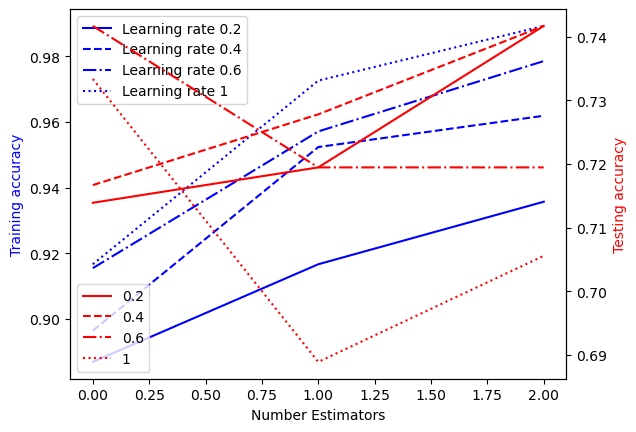

In [31]:
get_accuracy_boost(X,y,title="Training and Test Accuracy vs Weak Classifiers",times=6,xlabel='Number Estimators', n_est = 8)

### Evaluation Metric on Second Dataset


We can input a  `eval_metric`  parameter  in the `fit` method; this  determines how the model performs on each iteration using a second dataset; in XG Boost the metrics include:


`logloss` : binary logarithmic loss

`mlogloss` cross entropy loss

`error` : number of misclassified samples

`auc` : area under  ROC curve (receiver operating characteristic curve)

We will use `error`:


In [32]:
eval_metric="error"

The validation data must be a list `eval_set`: the list  contains a tuple, the first element of the tuple must be the features, the second must be the labels:


In [33]:
eval_set = [(X_test, y_test)]

When we fit the model, we input all the Hyperparameter   we set  `verbose=True` to display the results for each epoch.


In [34]:
model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.25000
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
       gamma=0, gpu_id=-1, importance_type=None,
       interaction_constraints='', learning_rate=0.3, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=100, n_jobs=8,
       num_parallel_tree=1, objective='binary:logistic', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       subsample=1, tree_method='exact', use_label_encoder=True,
       validate_parameters=1, verbosity=None)

We can obtain the result for each iteration as a Python `dict` .`validation_0` is the label for dataset we input; this contains a nested dictionary. The nested dictionary's key is the type of metric; the values is a list that includes the value of the metric used for each epoch.


In [35]:
results = model.evals_result()
print(results)

{'validation_0': OrderedDict([('error', [0.25, 0.283333, 0.3, 0.283333, 0.266667, 0.266667, 0.3, 0.283333, 0.283333, 0.3, 0.3, 0.283333, 0.3, 0.266667, 0.283333, 0.283333, 0.283333, 0.283333, 0.283333, 0.283333, 0.3, 0.283333, 0.3, 0.3, 0.3, 0.283333, 0.283333, 0.283333, 0.283333, 0.283333, 0.283333, 0.283333, 0.283333, 0.3, 0.316667, 0.3, 0.3, 0.3, 0.283333, 0.3, 0.316667, 0.3, 0.283333, 0.316667, 0.3, 0.316667, 0.316667, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.316667, 0.3, 0.3, 0.3, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.316667, 0.3, 0.316667, 0.3, 0.3, 0.316667, 0.316667, 0.333333, 0.316667, 0.333333, 0.333333, 0.333333, 0.316667, 0.333333, 0.333333, 0.333333, 0.333333])])}


We can plot the results for each epoch, we see the test error increases.


Text(0, 0.5, 'Misclassified Samples')

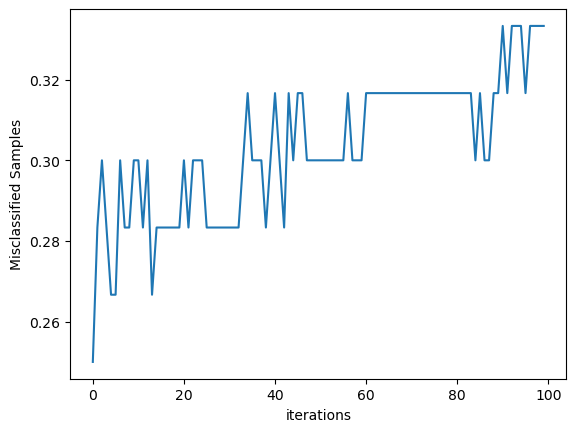

In [36]:
plt.plot(range(0, len(results['validation_0']['error'])), results['validation_0']['error'])
plt.xlabel('iterations')
plt.ylabel('Misclassified Samples')

We can input multiple datasets, for example we can input the training and test data and use the metric `logloss`.


In [37]:
eval_metric='logloss'
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set,verbose=False)
results=model.evals_result()

The dict  contains two elements the loss for the training and testing data, we display  the keys :


In [38]:
results.keys()

dict_keys(['validation_0', 'validation_1'])

We can plot the error here for each epoch.


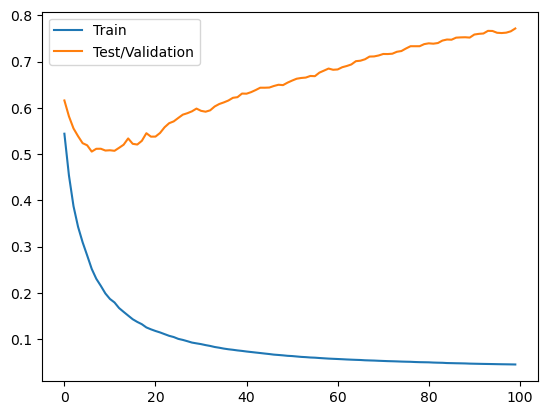

In [39]:
fig, ax = plt.subplots()
ax.plot( results['validation_0']['logloss'], label='Train')
ax.plot( results['validation_1']['logloss'], label='Test/Validation')
ax.legend()
plt.show()

We see that the training error decreases for each epoch in blue, but the validation error flattens then increases; this is a sign of overfitting. We can reduce this by early stopping.


#### Early Stopping


Early Stopping is a way to prevent overfitting; we stop gradient descent based on a specified number of epochs over which no improvement is observed using the evaluation set . The input parameter is  `early_stopping_rounds`.


In [40]:
early_stopping_rounds=10

We train the model:


In [41]:
eval_set = [(X_test, y_test)]
eval_metric='logloss'
model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True,early_stopping_rounds=early_stopping_rounds)

[0]	validation_0-logloss:0.61624
[1]	validation_0-logloss:0.58189
[2]	validation_0-logloss:0.55580
[3]	validation_0-logloss:0.53902
[4]	validation_0-logloss:0.52394
[5]	validation_0-logloss:0.51934
[6]	validation_0-logloss:0.50572
[7]	validation_0-logloss:0.51177
[8]	validation_0-logloss:0.51186
[9]	validation_0-logloss:0.50799
[10]	validation_0-logloss:0.50859
[11]	validation_0-logloss:0.50742
[12]	validation_0-logloss:0.51383
[13]	validation_0-logloss:0.52053
[14]	validation_0-logloss:0.53418
[15]	validation_0-logloss:0.52254
[16]	validation_0-logloss:0.52095


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
       gamma=0, gpu_id=-1, importance_type=None,
       interaction_constraints='', learning_rate=0.3, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=100, n_jobs=8,
       num_parallel_tree=1, objective='binary:logistic', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       subsample=1, tree_method='exact', use_label_encoder=True,
       validate_parameters=1, verbosity=None)

We see the model does better for the same Hyperparamters values.


In [42]:
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.7, 'train Accuracy': 0.9571428571428572}


## Parameters for Trees


We can also change tree parameters, consider our first example:


In [43]:
objective='binary:logistic'
learning_rate=0.1
n_estimators=10
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators,eval_metric='mlogloss')
model.fit(X_train, y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.7166666666666667, 'train Accuracy': 0.95}


`max_depth` is the maximum depth of a tree. Increasing this value will make overfitting more likely, do decreasing max depth will decrease overfitting:


In [44]:
max_depth=3

In [45]:
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators,eval_metric='mlogloss',max_depth=max_depth)
model.fit(X_train, y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.8, 'train Accuracy': 0.8714285714285714}


`min_child_weight` is essentially the minimum number of instances needed to be in each node,  larger values decrease overfitting. the default is one; setting it to four  we get better results on the training data.


In [46]:
min_child_weight=4

In [47]:
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators,eval_metric='mlogloss',min_child_weight=4)
model.fit(X_train, y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.7666666666666667, 'train Accuracy': 0.85}


`gamma`, `reg_lambda` , `alpha` are other regularization parameters with default parameters of 0, 1 and 0, respectively. Increasing these parameters, will decrease overfitting.


In [48]:
gamma=1
reg_lambda=2
alpha=1
model =XGBClassifier(objective=objective,learning_rate=learning_rate,n_estimators=n_estimators,eval_metric='mlogloss',gamma=gamma,reg_lambda=reg_lambda,alpha=alpha)
model.fit(X_train, y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  model))

{'test Accuracy': 0.8, 'train Accuracy': 0.8357142857142857}


<h2 id="Example">Cancer Data Example with GridSearchCV</h2>

The example is based on a dataset that is publicly available from the UCI Machine Learning Repository <a href=http://mlearn.ics.uci.edu/MLRepository.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01>Asuncion and Newman, 2007 </a>. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |

<br>
<br>

Let's load the dataset, then use XG Boost to classify samples.


In [49]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")

df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Now lets remove rows that have a ? in the <code>BareNuc</code> column:


In [50]:
df= df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]

We obtain the features:


In [51]:
X =  df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [52]:
X=X.astype('int64')

We obtain the class labels:


In [53]:
y=df['Class']
y.unique()

array([2, 4])

We split the data into training and testing sets.


In [54]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


We use <code>GridSearchCV</code> to search over specified parameter values of the model.


In [55]:
from sklearn.model_selection import GridSearchCV

We create a <code>AdaBoost</code> object and list the parameters using the method <code>get_params()</code>:


In [56]:
model =XGBClassifier(objective='binary:logistic',eval_metric='mlogloss')


We can use GridSearch for Exhaustive search over specified parameter values. We see many of the parameters are similar to Classification trees; let's try different parameters for <code>learning_rate</code> and <code>n_estimators</code> .


In [57]:
param_grid = {'learning_rate': [0.1*(n+1) for n in range(5)],
             'n_estimators' : [2*n+1 for n in range(5)]}

param_grid 

{'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5],
 'n_estimators': [1, 3, 5, 7, 9]}

We create the Grid Search object and fit it (this may take some time):


In [58]:
search = GridSearchCV(estimator=model, param_grid=param_grid,scoring="neg_log_loss")
search.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None,
       enable_categorical=False, eval_metric='mlogloss', gamma=None,
       gpu_id=None, importance_type=None, interaction_constraints=None,
       learning_rate=None, ...ple=None, tree_method=None, use_label_encoder=True,
       validate_parameters=None, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5], 'n_estimators': [1, 3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

We can see the best accuracy score of the searched parameters was ~96%.


In [59]:
search.best_score_

-0.10187796895194376

The best parameter values are:


In [60]:
search.best_params_

{'learning_rate': 0.5, 'n_estimators': 9}

We can calculate accuracy on the test data using the test data:


In [61]:
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 0.9635036496350365, 'train Accuracy': 0.989010989010989}


<h2 id="practice">Practice</h2>


Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug C, Drug X and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.


In [62]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv", delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Let's create the X and Y for our dataset:


In [63]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [64]:
y = df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

Now lets use a <code>LabelEncoder</code> to turn categorical features into numerical:


In [65]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Split the data into training and testing data with a 80/20 split:


In [66]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 5) (160,)
Test set: (40, 5) (40,)


We can use GridSearch for Exhaustive search over specified parameter values.


In [82]:
param_grid = {'learning_rate': [0.1*(n+1) for n in range(2)],
             'n_estimators' : [2*n+1 for n in range(2)] }


param_grid

{'learning_rate': [0.1, 0.2], 'n_estimators': [1, 3]}

Create a <code>XGBClassifier</code>object called <cood>model</code>, set `objective` to  `binary:logistic` and `,eval_metric` to `mlogloss` :


In [83]:
model = XGBClassifier(objective = "binary:logistic", eval_metric = "mlogloss")

<details><summary>Click here for the solution</summary>

```python
model =XGBClassifier(objective='binary:logistic',eval_metric='mlogloss')

```

</details>


Create <code>GridSearchCV</code> object called `search` with the `estimator` set to <code>model</code>, <code>param_grid</code> set to <code>param_grid</code>, <code>scoring</code> set to <code>neg_log_loss</code>, and <code>cv</code> set to 3 and Fit the <code>GridSearchCV</code> object to our <code>X_train</code> and <code>y_train</code> data (this may take some time)


In [84]:
search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = "neg_log_loss", cv = 3)
search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None,
       enable_categorical=False, eval_metric='mlogloss', gamma=None,
       gpu_id=None, importance_type=None, interaction_constraints=None,
       learning_rate=None, ...ple=None, tree_method=None, use_label_encoder=True,
       validate_parameters=None, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.1, 0.2], 'n_estimators': [1, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

<details><summary>Click here for the solution</summary>

```python
search = GridSearchCV(estimator=model, param_grid=param_grid,scoring="neg_log_loss")
search.fit(X_train, y_train)
```

</details>


We can find the accuracy of the best model.


In [85]:
search.best_score_

-0.8305117800831795

We can find the best parameter values:


In [86]:
search.best_params_

{'learning_rate': 0.2, 'n_estimators': 3}

We can find the accuracy test data:


<details><summary>Click here for the solution</summary>

```python
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))
```

</details>


In [87]:
print(get_accuracy(X_train,X_test,y_train,y_test,search.best_estimator_))

{'test Accuracy': 0.825, 'train Accuracy': 1.0}


## How  Gradient Boosting  Works (Optional)


Let's try to sketch   how Gradient Boosting works like any supervised problem we have a dataset  ${(x_1, y_1), ..., (x_N,; y_N)} $, the strong classifier $H_{T}(x)$  is a linear combination of $T$  weak classifiers $h_t(x)$  usually trees and $\alpha_t$  is a constant in many cases $\alpha_t=1$  . Although each classifier $h_t(x)$ appears independent, the  contains information about the error of classifiers from $h_1(x),.., h_{t}(x)$.

$H_{T}(\mathbf{x}) =   \sum_{t=1}^T \alpha_t h_t(\mathbf{x}) $

Borrowing the notation form <a href=https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote19.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01> Kilian Weinberger </a>, we have a the cost function:

$\ell(H)=rac{1}{n}\sum_{i=1}^n \ell(H_{T}(\mathbf{x}_i),y_i)$

Where $\ell$ convex i.e bole shape shown below and differentiable, such as derivative exists.


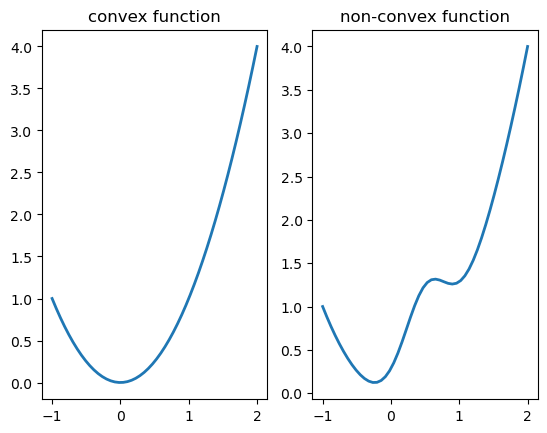

In [88]:
x = np.linspace(-1, 2)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, x**2, linewidth=2)
ax1.set_title('convex function')
ax2.plot(x, x**2 + np.exp(-5*(x - .5)**2), linewidth=2)
ax2.set_title('non-convex function')
plt.show()


If you're familiar with cost functions, this may seem strange as we are dealing with a function of $H$ not of parameters. Ideally would like to minimize the cost for  $h_{T}(\mathbf{x})$  and  $H_{T-1}(\mathbf{x})$ at the same time   , but this is difficult. So we minimize the cost with respect to   $h_{T}(\mathbf{x})$  while keeping $H_{T-1}(\mathbf{x})$ fixed; not only is this simpler it prevents overfitting.

$h_{t}(x) = 	extrm{argmin}_{   h \in \mathbb{H}} \sum_{i=1}^n \ell(  H_{t-1}(\mathbf{x}_i) + \gamma h_t(\mathbf{x}_i),y_i)$  (1)


Usually $\gamma$  is selected using validation data, but in some cases, like AdaBoost, you can find  the expression for the  optimal value of $\gamma$.


### How to Minimize Cost


We would like to find the value of classifier $h_{t}(x)$ in red  that minimises the Cost function in (1), this is difficult so we minimize the first order Taylor Approximation as shown in (2). We see that it is only a function of the second term in red.


$\ell(H+\alpha \color{red}{h})\approx\ell(H)+ \gamma \sum_{i = 1}^{n} r_{i,t-1} \color{red}{h_{t}(\mathbf{x}_i)}$ (2)

$r_{i,t-1}=rac{\partial \ell}{\partial [H_{t-1}(\mathbf{x}_i)]}$


An example of Taylor Approximation is shown in the following figure, the true cost function is in blue and the first Taylor Approximation is in Orange.


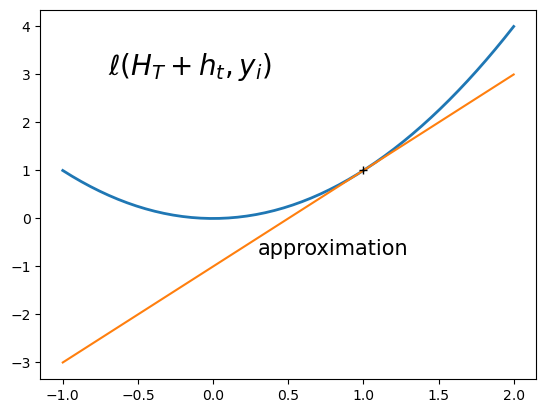

In [89]:
plt.plot(x, x**2, linewidth=2)
plt.text(-.7, 3, '$ \ell(H_{T}+h_{t},y_i)$', size=20)
plt.plot(x, 2*x - 1)
plt.plot(1, 1, 'k+')
plt.text(.3, -.75, 'approximation', size=15)
plt.show()

For small values of $\gamma$ this will hold, using the approximation, we can decouple the problem as follows; the $argmax$ of $h$  only cares about the red terms. As a result, we find the value of $r_{i}$ and the minimum concerning $h$. First let's find $r_{i}$, we need the loss function:


$h_{t}(x) = 	extrm{argmin}_{   h \in \mathbb{H}}  \sum_{i=1}^n \ell(  H_{t-1}(\mathbf{x}_i) + \gamma h_{t}(\mathbf{x}_i),y_i) $
$ \approx 	extrm{argmin}_{   h \in \mathbb{H}} \ell(H)+  \sum_{i = 1}^{n} r_{i} \color{red}{h_{t}(\mathbf{x}_i)} $


$=	extrm{argmin}_{h \in \mathbb{H}}\{ \sum_{i = 1}^{n} r_{i} \color{red}{h_{T}(\mathbf{x}_i)}\}$  (3)


### Example with Python


This all seems a little confusing so let’s do a simple example with the Root mean square error loss are write the Python code. This is not usually used for regression but can be used for classification and  the math is relatively  simple to understand. First we calculate $r_{i}$:


$ \ell(H) =\sum_{i=1}^n (r_{i,t-1}-  H_{t-1}(\mathbf{x}_i))^{2} $

$ r_{i,t}=rac{\partial \ell}{\partial [H_{T-1}(\mathbf{x}_i)]}=2\sum_{i=1}^n ( r_{i,t-1}-  H_{T-1}(\mathbf{x}_i))$


Then we plug it into equation 3; with some math, we get the following expression below, just a note these steps are not as simple as they look, so check out  <a href=https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote19.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01> Kilian Weinberger </a> for more details.


$h_{t}(x) =	extrm{argmin}_{h \in \mathbb{H}}{ \sum_{i = 1}^{n} r_{i,t} \color{red}{h_{t}(\mathbf{x}_i)}}$

$=	extrm{argmin}_{h \in \mathbb{H}}{ \sum_{i = 1}^{n} 2\sum_{i=1}^n (y_i-  H_{T-1}(\mathbf{x}_i)) \color{red}{h_{T}(\mathbf{x}_i)}}$

$=	extrm{argmin}_{h \in \mathbb{H}}{ \sum_{i = 1}^{n} (r_{i,t}^{2}- {h_{t}(\mathbf{x}_i)})^{2}}$


Let’s go through a few iterations; at the same time implement the algorithm with  Python. For the Python portion we will use the Toy data where the class of y is as following $y=0$ if $ 0<x<1$ else if  $y=1$, $1 \leq x< 2$ else $y=3$.


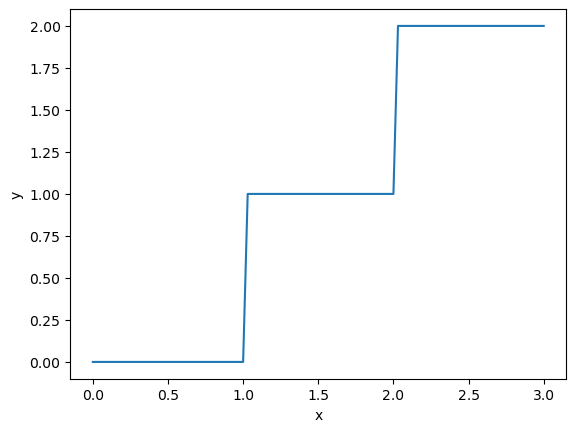

In [90]:
X=np.linspace(0, 3,num=100)
 
y=np.zeros(X.shape)
y[X>1]=1
y[X>2]=2
plt.plot(X,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

For the first iteration we start off with $h_1(\mathbf{x})$ minimizing the original labels $y_{i}$ that equals $r_{i,1}$.


$h_{1}(x)=	extrm{argmin}_{h \in \mathbb{H}}{ \sum_{i = 1}^{n} (y_{i}- {h_{1}(\mathbf{x}_i)})^{2}}$


All this means is we apply any algorithm with the cost function in the same form to the data. One constraint is  $h$ has to be non-linear, in Python:


In [91]:
reg = DecisionTreeRegressor(max_depth=1)
reg.fit(X.reshape(-1,1),y)
h_1=reg.predict(X.reshape(-1,1))

We can plot the prediction, we see it's not even a true classifier.


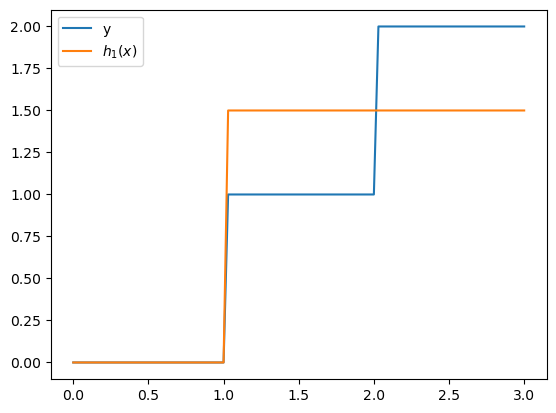

In [92]:
plt.plot(X,y,label="y")
plt.plot(X,h_1,label="$h_{1}(x)$")
plt.legend()
plt.show()

For the second step  we set  $H_{1}(\mathbf{x})=h_{1}(\mathbf{x})$,then we calculate $r_{i,2}$.


$ r_{i,2}=( r_{i,1}-  H_{1}(\mathbf{x}_i))$


In [93]:
gamma=1
r=y-gamma*reg.predict(X.reshape(-1,1))

We then find the second learner $h_{2}(\mathbf{x})$ by minimizing


$h_{2}(x)=	extrm{argmin}_{h \in \mathbb{H}}{ \sum_{i = 1}^{n} (r_{i,2}^{2}- {h_{2}(\mathbf{x}_i)})^{2}}$


We then update $H_{2} (\mathbf{x})= H_{1} (\mathbf{x})+ \gamma h_{2}(\mathbf{x})$


We repeat the process for $ t$ times:


$ r_{i,t}^2=( r_{i,t-1}-  H_{t-1}(\mathbf{x}_i))^{2}$


$h_{t}(x)=	extrm{argmin}_{h \in \mathbb{H}}{ \sum_{i = 1}^{n} (r_{i,t}^{2}- {h_{t}(\mathbf{x}_i)})^{2}}$


We then update $H_{t} (\mathbf{x})= H_{t-1} (\mathbf{x}) + \gamma h_{t}(\mathbf{x})$


We can perform the Operation with a loop in Python. First, we will write a function to make a prediction using an input of a list of predictors `weak_learners`.


In [94]:
def predict(y,weak_learners,gamma):
    yhat=np.zeros(y.shape)
    for h in weak_learners:
        yhat+=h.predict(X.reshape(-1,1))
    return yhat



Then we train a new weak learner recursively setting gamma=1, and plot the results for each iteration.


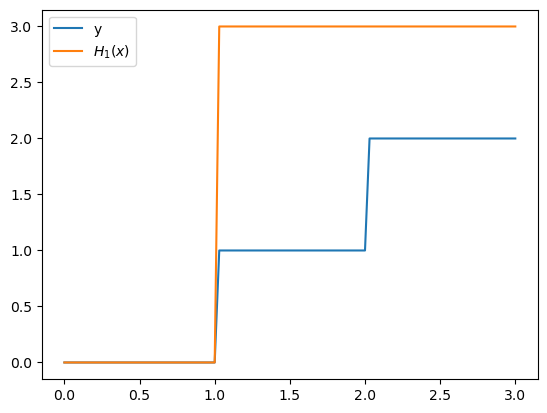

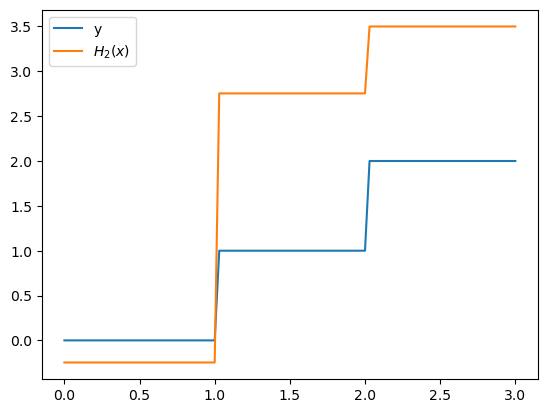

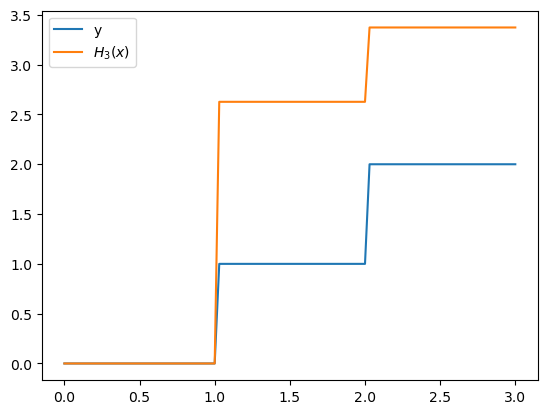

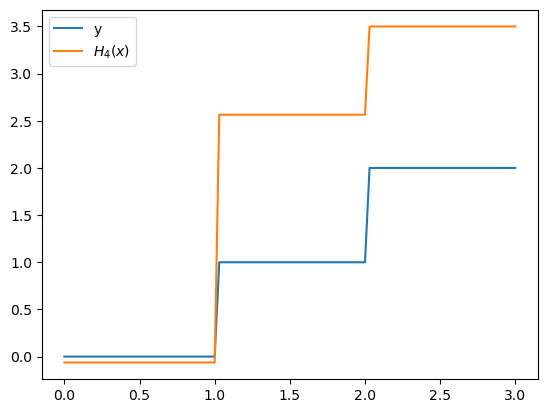

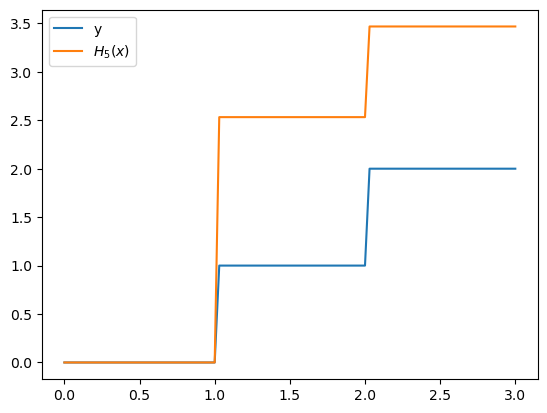

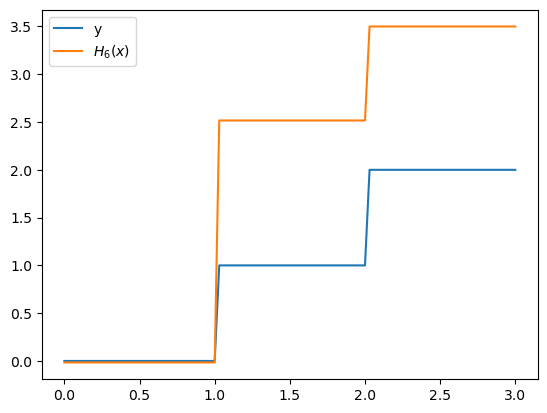

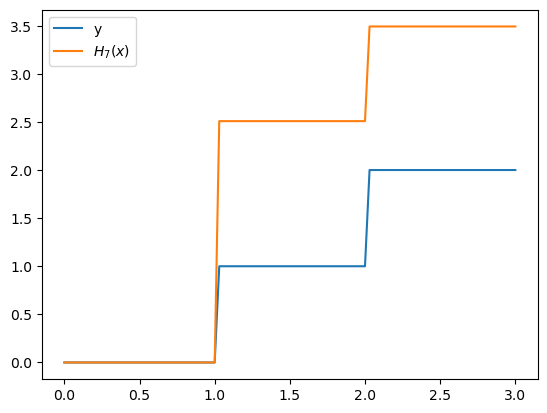

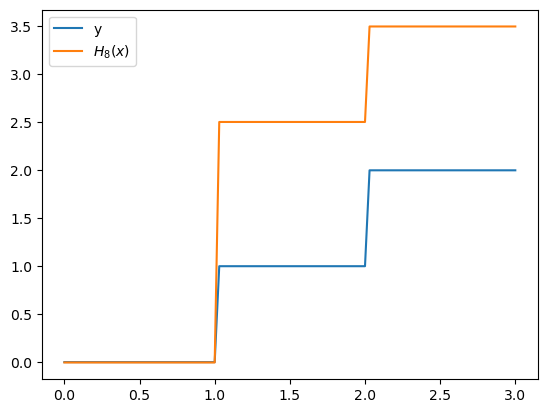

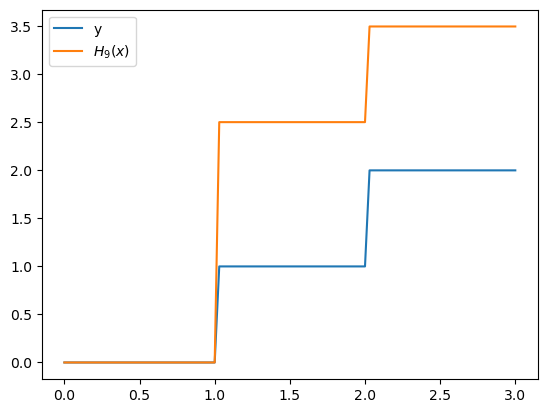

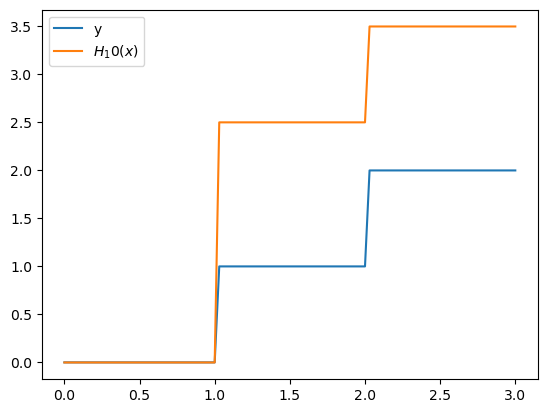

In [95]:
weak_learners =[]
gamma=1
r=y
weak_learners.append(reg)
for t_ in range(0,10):
    #train weak learner 
    reg=DecisionTreeRegressor(max_depth=1)
    reg.fit(X.reshape(-1,1),r)
    weak_learners.append(reg)
    
    #Calculate r_i,t for each iteration  
    r=r-gamma*reg.predict(X.reshape(-1,1))
    #plot function   
    plt.plot(X,y,label="y")
    plt.plot(X,predict (y,weak_learners,gamma),label="$H_{}(x)$".format(t_+1))
    plt.legend()
    plt.show()

### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/richard-ye/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01" target="_blank">Richard Ye</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By           | Change Description   |
| ----------------- | ------- | -------------------- | -------------------- |
| 2020-11-27        | 0.1     | Joseph Santarcangelo | Created Lab Template |
| 2022-3-29         | 0.2     | Steve Hord           | QA Pass              |
| 2022-05-03        | 0.3     | Richard Ye           | Updated `get_accuracy_boost` to include tqdm and fixed latex rendering|

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
